In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind
import datacamp as dc
#plt.style.use('ggplot')

In [2]:
selected_beats = ['1A10' ]

In [3]:
beats = gpd.read_file('data/HPB.geojson')
stadiums  = gpd.read_file('data/stadiums.geojson')

In [4]:
stadiums = stadiums[stadiums.name == 'Minute Maid Park']

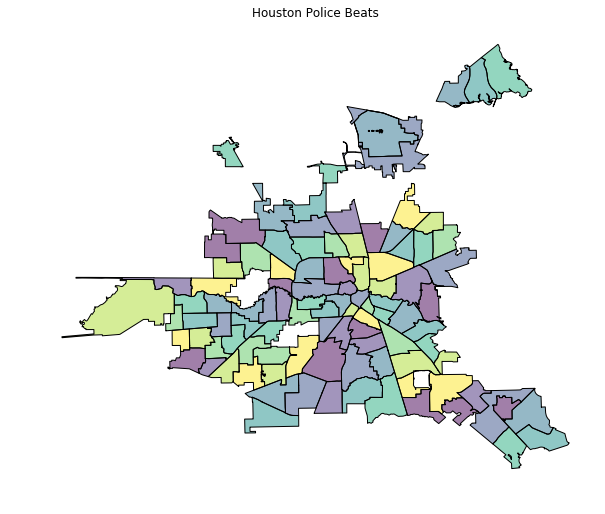

In [5]:
beats.plot(figsize=(10,10))
plt.axis('off')
plt.title('Houston Police Beats')
plt.show()

In [7]:
sel_df = beats[beats['Beats'].isin(selected_beats)]
sh = pd.concat([sel_df,stadiums])


## HPD Beat 1A10

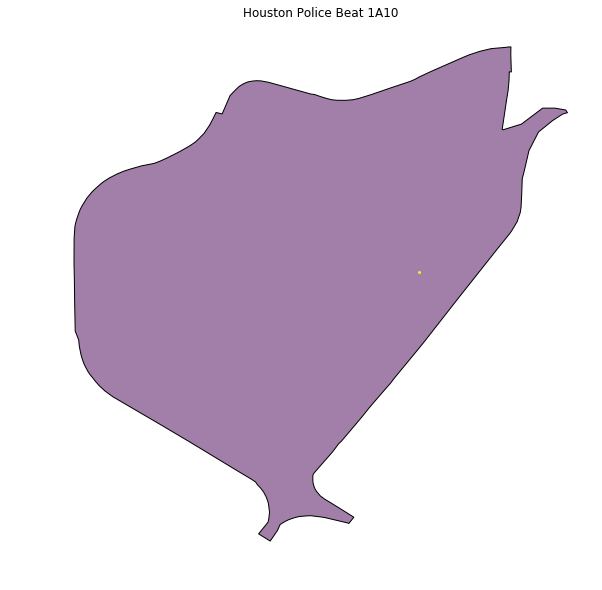

In [9]:
sh.plot(figsize=(10,10))
plt.axis('off')
plt.title('Houston Police Beat 1A10')
plt.show()

In [10]:
m = folium.Map([29.756944, -95.355556], zoom_start=14, tiles="OpenStreetMap")
folium.GeoJson(sh.to_json()).add_to(m)
m

 image view 
 
 
 
![img](Capture.PNG)

## load data

In [11]:
data = 'data/Astros1017_final.csv'

In [12]:
df = pd.read_csv(data)
df.head()

,date,offenses,away_team,win
0,2010-01-01,11.0,NaN,NaN
1,2010-01-02,11.0,NaN,NaN
2,2010-01-03,8.0,NaN,NaN
3,2010-01-04,6.0,NaN,NaN
4,2010-01-05,5.0,NaN,NaN


In [13]:
# set data as datatime index
df['date'] = pd.to_datetime(df['date'] )
df = df.set_index('date').sort_index(ascending=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2010-01-01 to 2017-12-30
Data columns (total 3 columns):
offenses     2891 non-null float64
away_team    658 non-null object
win          658 non-null float64
dtypes: float64(2), object(1)
memory usage: 91.3+ KB


# small cleanum

In [15]:
df.offenses = df.offenses.fillna(0) # nan offenses are now 0
df.offenses = df.offenses.astype(int)  # offenses are now int not float

## separate days with games and days without


In [16]:
game = df[df.away_team.notnull()]
game.win = game.win.astype(int)

no_game = df[df.away_team.isnull()]

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


NormaltestResult(statistic=172.97535137309288, pvalue=2.7471330682164935e-38)

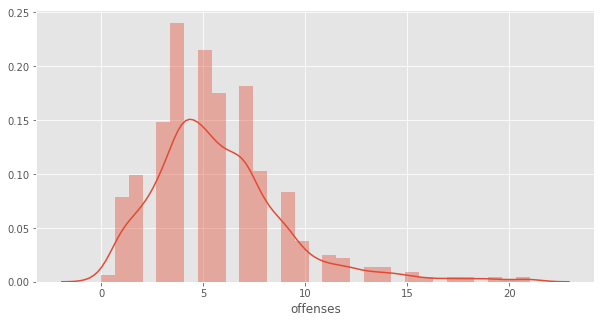

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))

sns.distplot(game.offenses)
stats.normaltest(game.offenses)

## split dataset 
Split dataset from games won and  games lost

In [21]:
w = game.win == 1
l = game.win == 0

w_games = game[w].offenses.as_matrix()
l_games = game[l].offenses.as_matrix()
won = game[w]
lost = game[l]

In [22]:
won.offenses.describe()

count    322.000000
mean       5.574534
std        3.296704
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       20.000000
Name: offenses, dtype: float64

In [23]:
lost.offenses.describe()

count    336.000000
mean       5.967262
std        3.222421
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       21.000000
Name: offenses, dtype: float64

## box plot Offenses based on Game result

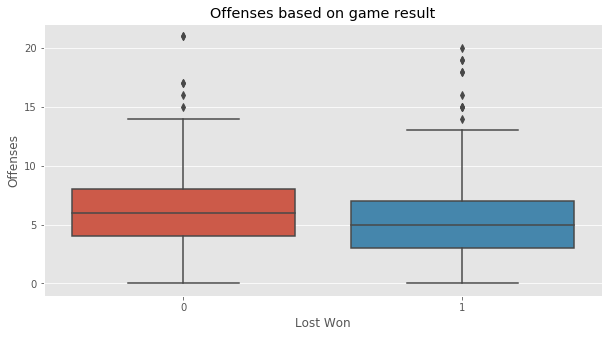

In [24]:
plt.figure(figsize=(10,5))

_ = sns.boxplot(x='win', y='offenses', data=game)
_ = plt.xlabel('Lost Won')
_ = plt.ylabel('Offenses')
_ = plt.title('Offenses based on game result')

plt.show()

## Plot Game Won vs Game Lost

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


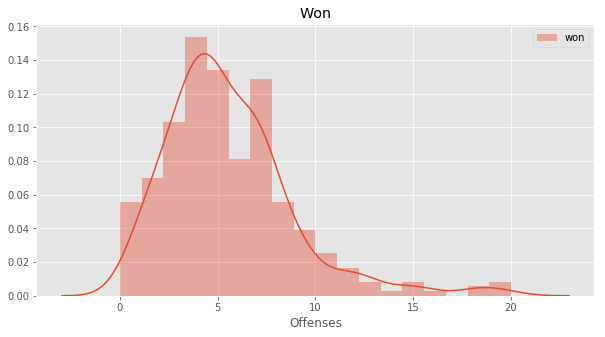

In [28]:
plt.figure(figsize=(10,5))

sns.distplot(won['offenses'],label='won',hist=True )
plt.xlabel('Offenses')
plt.title('Won')
plt.legend()
plt.show()

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


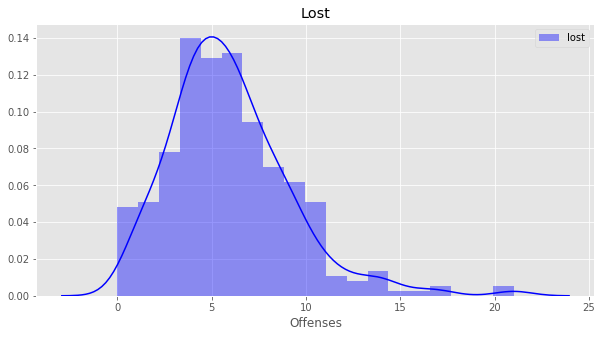

In [27]:
plt.figure(figsize=(10,5))

sns.distplot(lost['offenses'], label='lost',hist=True, color='b')
plt.xlabel('Offenses')
plt.title('Lost')
plt.legend()
plt.show()

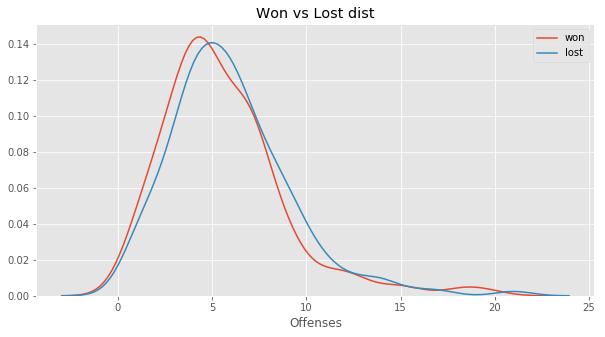

In [29]:
plt.figure(figsize=(10,5))

sns.distplot(won['offenses'],label='won',hist=False )
sns.distplot(lost['offenses'], label='lost',hist=False)
plt.xlabel('Offenses')
plt.title('Won vs Lost dist')
plt.legend()
plt.show()

## ECDF

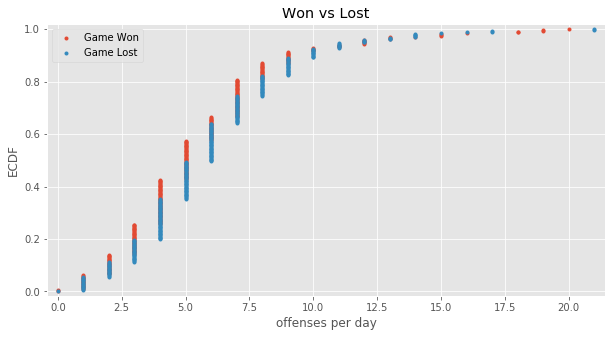

In [30]:
plt.figure(figsize=(10,5))

# Compute ECDF for offenses data: x_vers, y_vers
x_won, y_won = dc.ecdf(won.offenses)
x_lost, y_lost = dc.ecdf(lost.offenses)

# Generate plot
_ = plt.plot(x_won, y_won, marker='.', linestyle='none',label='Game Won')
_ = plt.plot(x_lost, y_lost, marker='.', linestyle='none', label='Game Lost')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('offenses per day')
_ = plt.ylabel('ECDF')
_ = plt.title('Won vs Lost')

plt.legend()

# Display the plot
plt.show()

## Display time graph of Offenses given Game result

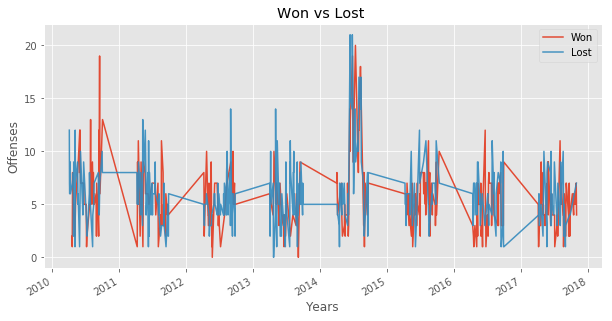

In [31]:
plt.figure(figsize=(10,5))

won.offenses.plot(label='Won')
lost.offenses.plot(alpha=.9,label='Lost')
_ = plt.xlabel('Years')
_ = plt.ylabel('Offenses')
_ = plt.title('Won vs Lost ')
plt.legend()
plt.show()

# Hypothesis test:

### More crimes happen when Astros Lose?

- $H_0$ loosing game creates more crime
- $H_1$ loosing game does not create more crime

## separate games lost vs games won

- won games: 322
- lost games : 336


## Tests:
- Permutation
- bootstrap: identical dist
- bootstrap: diff of means

In [32]:
len(w_games)

322

In [37]:
w_games

array([ 2,  1,  8,  5,  6,  2,  5,  8,  8, 12,  8, 12,  8,  7,  7,  5,  5,
        3,  1,  2,  5,  5,  5, 13,  6,  5,  9,  5,  8,  6,  6,  5,  6,  2,
        7,  4,  2, 12,  7, 19,  6, 13,  1,  9,  5, 11,  2,  8,  9,  1,  9,
        8,  6,  6,  5,  7,  7,  5,  4,  7,  1,  4,  4,  3, 11,  8,  3,  5,
        2,  6,  4,  5,  4,  8,  6,  2, 10,  4,  4,  3,  3,  7,  3,  3,  9,
        4,  1,  4,  0,  6,  7,  7,  5,  3,  3,  4,  1,  4,  7,  7,  9,  6,
       10,  5,  5,  7,  5,  5,  6,  4,  7, 10,  5,  7,  4,  3,  7,  4,  3,
        4,  3,  1,  4,  2,  6,  2,  4,  3,  6,  3,  0,  9,  7,  8,  4,  7,
        5,  2,  3,  5,  2,  4,  4,  7,  2,  3, 14, 10, 13, 19, 16,  9, 20,
        8, 12, 12, 15, 15, 18, 18, 15,  3,  8,  1,  4,  4,  7,  4,  7,  7,
        6,  6,  4,  7,  3,  5,  6,  4,  2,  4,  3,  5,  7,  3,  1,  5,  4,
        5,  6,  3,  7,  7,  5,  4,  6,  5,  2,  8,  8,  6,  6,  7,  8,  5,
        7,  4,  7,  5, 11,  5,  5,  7,  8,  2,  4,  7,  4,  6,  5,  5,  3,
        9,  4, 10,  3,  2

In [33]:
len(l_games)

336

In [38]:
l_games

array([12,  7,  6,  9,  9,  6,  7,  8,  2,  9,  8,  8,  1, 12,  7,  9,  5,
        6,  1, 10,  4,  7,  5,  9,  3,  2,  6,  8,  6,  1,  4,  5,  7,  8,
        6,  4,  7, 10,  8,  8,  6,  5,  6,  5,  9,  6,  4,  8,  3, 13, 10,
        8, 12,  8,  4,  4,  8,  6,  1, 11,  6,  2,  5,  8,  4,  5,  5,  5,
        5,  7,  4,  6,  6,  9,  6,  5,  4,  6,  4,  2,  3,  3,  7,  3,  1,
        5,  2,  2,  6,  5,  3,  5,  5,  6,  4,  2,  3,  3,  4,  5,  6,  6,
        5,  4,  4,  7,  4,  6,  4,  5,  4,  6,  4,  6,  4,  7,  6,  4,  4,
        8, 10,  4,  5,  5,  8,  6,  3, 14,  8,  2,  6,  6,  4,  2,  6,  7,
        2,  7, 10,  5,  7,  1,  0,  4, 14,  9,  6,  1,  5,  8, 11,  5,  7,
        6,  6,  2,  2,  6,  3,  4,  1,  9,  5,  4,  5,  5,  4,  1,  9,  7,
       11,  8,  4,  8,  8, 10,  4,  6,  3,  9,  1,  7,  4,  4,  8,  5,  5,
        5,  9,  4,  7,  5,  5,  5,  4,  4,  3,  1,  7,  6,  5,  4,  7,  6,
        5,  7,  4,  3,  6,  4, 21, 15, 14, 21, 16,  9,  9,  6, 14,  9, 11,
       10, 13, 13, 17, 14

### Permutation test with a test statistic of the difference of means

In [34]:
# Compute difference of mean lost games and won games: empirical_diff_means
empirical_diff_means = dc.diff(l_games,w_games)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = dc.draw_perm_reps(l_games, w_games,
                                 dc.diff, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0591


### Bootstrap test for identical distributions

In [35]:
# Compute difference of mean offenses from lost and won games: empirical_diff_means
empirical_diff_means = dc.diff(l_games,w_games)

# Concatenate games: games_concat
games_concat = np.concatenate((l_games, w_games))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(games_concat, size=len(games_concat))
    
    # Compute replicate
    bs_replicates[i] = dc.diff(bs_sample[:len(l_games)],
                                     bs_sample[len(w_games):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0589


### Two-sample bootstrap hypothesis test for difference of means.

In [36]:
# Compute mean of all games: mean_games
mean_games = np.mean(games_concat)

# Generate shifted arrays
l_shifted = l_games - np.mean(l_games) + mean_games
w_shifted = w_games - np.mean(w_games) + mean_games

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_l = dc.draw_bs_reps(l_shifted, np.mean, 10000)
bs_replicates_w = dc.draw_bs_reps(w_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_l - bs_replicates_w

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000

print('p-value =',p)

p-value = 0.0612


## Result

## Tests:
- Permutation
    - p-value = 0.0591

- bootstrap: identical dist:
    - p-value = 0.0589

- bootstrap: diff of means
    - p-value = 0.0612
---
All results  $p > 0.05$

Reject null hypothesis as loosing game does not generate more crime(offenses)